<a href="https://colab.research.google.com/github/ClarissaGorton/Clarissa-Gorton-Portfolio/blob/main/Data_Analysis_and_Hypothesis_testing_Australian_Fatal_Road_Accidents_(1989_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   #   **Australian Fatal Road Accidents (1989-2021) Data Analysis and Hypothesis testing**

## **1. Loading Modules**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# **2. Loading Dataset**

In [ ]:
crashdata_csv = 'Crash_data.csv'
crashdata= pd.read_csv(crashdata_csv,header = 0, sep = ",", parse_dates= {"Date": ["Year","Month","Dayweek"]}, keep_date_col=True, index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Above I added a new "Date" column to the dataframe

# **3. Exploring Dataset**

In [ ]:
crashdata.head()

,Date,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,2021-09-05,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,2021-09-04,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,2021-09-04,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,2021-09-04,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,2021-09-04,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [ ]:
crashdata.shape

(52843, 24)

In [ ]:
crashdata.dtypes

Date                             datetime64[ns]
Crash ID                                  int64
State                                    object
Month                                    object
Year                                     object
Dayweek                                  object
Time                                     object
Crash Type                               object
Bus Involvement                          object
Heavy Rigid Truck Involvement            object
Articulated Truck Involvement            object
Speed Limit                              object
Road User                                object
Gender                                   object
Age                                       int64
National Remoteness Areas                object
SA4 Name 2016                            object
National LGA Name 2017                   object
National Road Type                       object
Christmas Period                         object
Easter Period                           

In [ ]:
crashdata.describe

<bound method NDFrame.describe of             Date  Crash ID State Month  Year    Dayweek   Time Crash Type  \
0     2021-09-05  20212133   Vic     9  2021     Sunday   0:30     Single   
1     2021-09-04  20214022    SA     9  2021   Saturday  23:31   Multiple   
2     2021-09-04  20212096   Vic     9  2021   Saturday  23:00     Single   
3     2021-09-04  20212145   Vic     9  2021   Saturday  22:25     Single   
4     2021-09-04  20212075   Vic     9  2021   Saturday   5:15     Single   
...          ...       ...   ...   ...   ...        ...    ...        ...   
52838 1989-01-04  19891246   NSW     1  1989  Wednesday  17:05     Single   
52839 1989-01-02  19895088    WA     1  1989     Monday   6:00     Single   
52840 1989-01-02  19895088    WA     1  1989     Monday   6:00     Single   
52841 1989-01-02  19895088    WA     1  1989     Monday   6:00     Single   
52842 1989-01-03  19896063   Tas     1  1989    Tuesday  12:40   Multiple   

      Bus Involvement Heavy Rigid Truck I

In [ ]:
#Replaced all space column with underscore
crashdata.columns = crashdata.columns.str.replace(' ','_')

In [ ]:
display(crashdata)

,Date,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Heavy_Rigid_Truck_Involvement,...,Age,National_Remoteness_Areas,SA4_Name_2016,National_LGA_Name_2017,National_Road_Type,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
0,2021-09-05,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,2021-09-04,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,2021-09-04,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,2021-09-04,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,2021-09-04,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,1989-01-04,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


# **4.  Data Cleaning**

1.   Removing Columns with too many NaN
2.   Removing " Pedestrian" rows
2.   Removing Duplicate Rows
3.   Fixing Dtypes
4.   Fixing NaN in "Age_Group", "Gender",  "Time", "Truck_Involvement", "Speed_Limit"
5.   Fixing Time Stamp

**1.   Removing Columns with too many NaN**

In [ ]:
# Checking which columns have the most NaN
crashdata.isna().sum().sort_values(ascending=False).head(10)

National_Road_Type               45966
National_Remoteness_Areas        45965
SA4_Name_2016                    45951
National_LGA_Name_2017           45950
Heavy_Rigid_Truck_Involvement    20515
Speed_Limit                        702
Age_Group                           90
Time                                40
Gender                              27
Bus_Involvement                     22
dtype: int64

In [ ]:
# Removing the columns that have >90% missing values.
crashdata.drop(['National_Road_Type','National_Remoteness_Areas', 'SA4_Name_2016','National_LGA_Name_2017', 'Heavy_Rigid_Truck_Involvement'], axis=1, inplace=True)

In [ ]:
# Checking 
crashdata.isnull().sum()

Date                               0
Crash_ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              40
Crash_Type                         0
Bus_Involvement                   22
Articulated_Truck_Involvement     22
Speed_Limit                      702
Road_User                          0
Gender                            27
Age                                0
Christmas_Period                   0
Easter_Period                      0
Age_Group                         90
Day_of_week                        0
Time_of_day                        0
dtype: int64

*Removing "Padestrian" and "Other/-9*

In [ ]:
# Removing "Pedestrian" and "Other/-9" from the "Road_user" column, as these will inpact overall analysis
Pedestrian =crashdata.groupby('Road_User').get_group('Pedestrian')


In [ ]:
Pedestrian.sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Date  Crash_ID State Month  Year    Dayweek   Time Crash_Type  \
1     2021-09-04  20214022    SA     9  2021   Saturday  23:31   Multiple   
45    2021-09-02  20215109    WA     9  2021   Thursday   9:48   Multiple   
74    2021-09-02  20215028    WA     9  2021   Thursday  19:00   Multiple   
76    2021-09-03  20213043   Qld     9  2021     Friday  23:00     Single   
77    2021-09-01  20211140   NSW     9  2021  Wednesday  20:00     Single   
...          ...       ...   ...   ...   ...        ...    ...        ...   
52813 1989-01-06  19892576   Vic     1  1989     Friday  17:15   Multiple   
52815 1989-01-03  19892061   Vic     1  1989    Tuesday  19:55     Single   
52816 1989-01-04  19892038   Vic     1  1989  Wednesday  18:50     Single   
52826 1989-01-02  19891386   NSW     1  1989     Monday  22:45     Single   
52827 1989-01-06  19891035   NSW     1  1989     Friday   5:15     Single   

      Bus_Inv

In [ ]:
crashdata.drop(crashdata.index[crashdata["Road_User"]== "Pedestrian"], inplace = True)

In [ ]:
crashdata.drop(crashdata.index[crashdata["Road_User"]== "Other/-9"], inplace = True)

In [ ]:
display(crashdata)

,Date,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
0,2021-09-05,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,Motorcycle rider,Male,38,No,No,26_to_39,Weekend,Night
2,2021-09-04,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,Passenger,Male,19,No,No,17_to_25,Weekend,Night
3,2021-09-04,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,Driver,Male,23,No,No,17_to_25,Weekend,Night
4,2021-09-04,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,Motorcycle rider,Male,46,No,No,40_to_64,Weekend,Night
5,2021-09-04,20213034,Qld,9,2021,Saturday,4:00,Multiple,No,No,100,Motorcycle rider,Male,19,No,No,17_to_25,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,1989-01-04,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,No,60,Passenger,Female,5,No,No,0_to_16,Weekday,Day
52839,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,No,110,Passenger,Male,19,Yes,No,17_to_25,Weekday,Day
52840,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,No,110,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day
52841,1989-01-02,19895088,WA,1,1989,Monday,6:00,Single,No,No,110,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day


In [ ]:
crashdata.shape

(44509, 19)

**2.   Removing Duplicate Rows**

In [ ]:
# Finding Duplicates
duplicates = crashdata[crashdata.duplicated()]
print(duplicates)

            Date  Crash_ID State Month  Year    Dayweek   Time Crash_Type  \
473   2021-04-03  20215012    WA     4  2021   Saturday  20:50     Single   
1426  2020-06-07  20203031   Qld     6  2020     Sunday   4:00     Single   
2803  2019-03-02  20193063   Qld     3  2019   Saturday   1:00     Single   
3139  2018-12-02  20185139    WA    12  2018     Sunday  15:18   Multiple   
5141  2017-04-02  20172029   Vic     4  2017     Sunday  14:30     Single   
...          ...       ...   ...   ...   ...        ...    ...        ...   
52623 1989-01-01  19895071    WA     1  1989     Sunday  22:17     Single   
52783 1989-01-05  19892372   Vic     1  1989   Thursday  14:08   Multiple   
52785 1989-01-05  19892372   Vic     1  1989   Thursday  14:08   Multiple   
52819 1989-01-04  19896006   Tas     1  1989  Wednesday  20:20   Multiple   
52841 1989-01-02  19895088    WA     1  1989     Monday   6:00     Single   

      Bus_Involvement Articulated_Truck_Involvement Speed_Limit  Road_User 

In [ ]:
# 155 Rows have been duplicated now to remove them:
crashdata.drop_duplicates(keep=False, inplace = True)

In [ ]:
# Checking duplicated rows have been removed:
duplicates = crashdata[crashdata.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Date, Crash_ID, State, Month, Year, Dayweek, Time, Crash_Type, Bus_Involvement, Articulated_Truck_Involvement, Speed_Limit, Road_User, Gender, Age, Christmas_Period, Easter_Period, Age_Group, Day_of_week, Time_of_day]
Index: []


In [ ]:
# All Duplicates have been removed

**3. Fixing Dtypes:**

In [ ]:
# Checking Dtypes
crashdata.dtypes

Date                             datetime64[ns]
Crash_ID                                  int64
State                                    object
Month                                    object
Year                                     object
Dayweek                                  object
Time                                     object
Crash_Type                               object
Bus_Involvement                          object
Articulated_Truck_Involvement            object
Speed_Limit                              object
Road_User                                object
Gender                                   object
Age                                       int64
Christmas_Period                         object
Easter_Period                            object
Age_Group                                object
Day_of_week                              object
Time_of_day                              object
dtype: object

**3a. Fixing Time dytpe**

In [ ]:
# Spliting "Time" so it is seporated
crashdata["Time"] = crashdata["Time"].str.split(":").str.join(".")

In [ ]:
# Changing the dtype from a object to Float
crashdata["Time"] = crashdata["Time"].astype("float64")
crashdata["Time"].dtype

dtype('float64')

In [ ]:
# changing "yes/no" values to binary bools to make it easier for visulisation. 
crashdata.Easter_Period.replace(("Yes","No"),(1,0),inplace=True)
crashdata.Christmas_Period.replace(("Yes","No"),(1,0),inplace=True)
crashdata.Bus_Involvement.replace(("Yes","No"),(1,0),inplace=True)
crashdata.Articulated_Truck_Involvement.replace(("Yes","No"),(1,0),inplace=True)

**4. Fixing NaN in "Age_Group", "Gender", "Time", "Truck_Involvement", "Speed_Limit"**

In [ ]:
# Locating NaN 
crashdata.isnull().sum()

Date                               0
Crash_ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              38
Crash_Type                         0
Bus_Involvement                   19
Articulated_Truck_Involvement     19
Speed_Limit                      570
Road_User                          0
Gender                            21
Age                                0
Christmas_Period                   0
Easter_Period                      0
Age_Group                         60
Day_of_week                        0
Time_of_day                        0
dtype: int64

**4a: Cleaning "Age_Group" NaN**

In [ ]:
crashdata["Age_Group"].value_counts()

17_to_25       12383
40_to_64       11441
26_to_39       10892
75_or_older     3406
0_to_16         3028
65_to_74        3025
Name: Age_Group, dtype: int64

In [ ]:
crashdata['Age_Group'].isnull().values.any()

True

In [ ]:
crashdata['Age_Group'].isnull().sum()

60

In [ ]:
crashdata[crashdata['Age_Group'].isnull()]

,Date,Crash_ID,State,Month,Year,Dayweek,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
158,2021-08-06,20212014,Vic,8,2021,Friday,9.56,Multiple,0.0,0.0,60,Passenger,Male,-9,0,0,NaN,Weekday,Day
3692,2018-07-03,20185038,WA,7,2018,Tuesday,4.00,Single,0.0,0.0,110,Driver,Male,-9,0,0,NaN,Weekday,Night
4159,2018-01-01,20185015,WA,1,2018,Monday,2.50,Single,0.0,0.0,50,Driver,Female,-9,0,0,NaN,Weekend,Night
8419,2014-08-04,20145069,WA,8,2014,Monday,6.08,Single,0.0,0.0,70,Driver,Male,-9,0,0,NaN,Weekday,Day
8475,2014-07-06,20141276,NSW,7,2014,Sunday,0.27,Single,0.0,0.0,60,Passenger,Male,-9,0,0,NaN,Weekend,Night
10757,2012-09-05,20121251,NSW,9,2012,Wednesday,2.50,Multiple,0.0,1.0,100,Passenger,Female,-9,0,0,NaN,Weekday,Night
14092,2010-02-05,20101089,NSW,2,2010,Friday,11.25,Multiple,0.0,0.0,100,Passenger,Female,-9,0,0,NaN,Weekday,Day
17449,2007-11-06,20077047,NT,11,2007,Tuesday,NaN,Single,0.0,0.0,110,Passenger,Male,-9,0,0,NaN,Weekday,Night
20840,2005-09-05,20051356,NSW,9,2005,Monday,14.10,Single,1.0,0.0,60,Passenger,Male,-9,0,0,NaN,Weekday,Day
20841,2005-09-05,20051356,NSW,9,2005,Monday,14.10,Single,1.0,0.0,60,Passenger,Female,-9,0,0,NaN,Weekday,Day


In [ ]:
# -9 does not fit into the other "Age_Groups"

In [ ]:
#Making a new age group for these 
crashdata['Age_Group'] = crashdata['Age_Group'].fillna('-1_to_0')

In [ ]:
# Checking that the -9 fits into the age group
crashdata.loc[158]

Date                             2021-08-06 00:00:00
Crash_ID                                    20212014
State                                            Vic
Month                                              8
Year                                            2021
Dayweek                                       Friday
Time                                            9.56
Crash_Type                                  Multiple
Bus_Involvement                                  0.0
Articulated_Truck_Involvement                    0.0
Speed_Limit                                       60
Road_User                                  Passenger
Gender                                          Male
Age                                               -9
Christmas_Period                                   0
Easter_Period                                      0
Age_Group                                    -1_to_0
Day_of_week                                  Weekday
Time_of_day                                   

In [ ]:
crashdata.isnull().sum()


Date                               0
Crash_ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              38
Crash_Type                         0
Bus_Involvement                   19
Articulated_Truck_Involvement     19
Speed_Limit                      570
Road_User                          0
Gender                            21
Age                                0
Christmas_Period                   0
Easter_Period                      0
Age_Group                          0
Day_of_week                        0
Time_of_day                        0
dtype: int64

**4b: Cleaning "Gender" NaN**

In [ ]:
crashdata['Gender'].isnull().sum()

21

In [ ]:
crashdata["Gender"].value_counts()

Male           31981
Female         12232
Unspecified        1
Name: Gender, dtype: int64

In [ ]:
# replacing the missing values in 'Gender' With "Unknown" as this is the case. 
crashdata['Gender'].fillna('Unknown', inplace=True)

In [ ]:
crashdata["Gender"].value_counts()

Male           31981
Female         12232
Unknown           21
Unspecified        1
Name: Gender, dtype: int64

In [ ]:
# Replacing "Unspecified" with "Unknown" to keep it consistant
crashdata.Gender.replace(("Unspecified"), ("Unknown"), inplace=True)

In [ ]:
crashdata["Gender"].value_counts()

Male       31981
Female     12232
Unknown       22
Name: Gender, dtype: int64

In [ ]:
crashdata.isnull().sum()

Date                               0
Crash_ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                              38
Crash_Type                         0
Bus_Involvement                   19
Articulated_Truck_Involvement     19
Speed_Limit                      570
Road_User                          0
Gender                             0
Age                                0
Christmas_Period                   0
Easter_Period                      0
Age_Group                          0
Day_of_week                        0
Time_of_day                        0
dtype: int64

**4c. Cleaning Missing "Time"**

In [ ]:
crashdata['Time'].isnull().sum()

38

In [ ]:
# filling in the missing values with the medium value of Time
crashdata["Time"].fillna(crashdata["Time"].median(), inplace=True)

In [ ]:
# checking
crashdata.isnull().sum()

Date                               0
Crash_ID                           0
State                              0
Month                              0
Year                               0
Dayweek                            0
Time                               0
Crash_Type                         0
Bus_Involvement                   19
Articulated_Truck_Involvement     19
Speed_Limit                      570
Road_User                          0
Gender                             0
Age                                0
Christmas_Period                   0
Easter_Period                      0
Age_Group                          0
Day_of_week                        0
Time_of_day                        0
dtype: int64

**4d: Cleaning "Bus_Involvement" & "Truck_Involvement NaN**

In [ ]:
# Replacing "Unknown" to "False"
crashdata['Bus_Involvement'].fillna(0, inplace=True)
crashdata['Articulated_Truck_Involvement'].fillna(0, inplace=True)

In [ ]:
crashdata["Bus_Involvement"].value_counts()
crashdata["Articulated_Truck_Involvement"].value_counts()

0.0    39396
1.0     4839
Name: Articulated_Truck_Involvement, dtype: int64

**4e. Cleaning "Speed_Limit" NaN**

In [ ]:
crashdata['Speed_Limit'].isnull().sum()

570

In [ ]:
# Cleaning NaN values with the mode of the speed limits captured
crashdata["Speed_Limit"].fillna(crashdata["Speed_Limit"].mode()[0], inplace=True)

In [ ]:
# Checking NaN values are fixed 
crashdata.isnull().sum()

Date                             0
Crash_ID                         0
State                            0
Month                            0
Year                             0
Dayweek                          0
Time                             0
Crash_Type                       0
Bus_Involvement                  0
Articulated_Truck_Involvement    0
Speed_Limit                      0
Road_User                        0
Gender                           0
Age                              0
Christmas_Period                 0
Easter_Period                    0
Age_Group                        0
Day_of_week                      0
Time_of_day                      0
dtype: int64

In [ ]:
crashdata["Speed_Limit"].value_counts()

100            11051
100             6749
60              4705
60              4642
80              3937
110             3741
110             1934
50              1890
70              1513
80              1419
90               753
-9               578
70               477
90               259
75               199
40               195
130              102
40                33
50                15
20                14
10                 8
30                 7
<40                4
20                 3
75                 2
5                  2
Unspecified        2
15                 1
Name: Speed_Limit, dtype: int64

In [ ]:
# Cleaning string values: 
crashdata['Speed_Limit'].replace("<40", 20, inplace=True)
crashdata['Speed_Limit'].replace(-9,0, inplace=True)
crashdata['Speed_Limit'].replace("Unspecified",0, inplace=True)

In [ ]:
crashdata["Speed_Limit"].value_counts()

100    11051
100     6749
60      4705
60      4642
80      3937
110     3741
110     1934
50      1890
70      1513
80      1419
90       753
0        580
70       477
90       259
75       199
40       195
130      102
40        33
50        15
20        14
10         8
30         7
20         7
75         2
5          2
15         1
Name: Speed_Limit, dtype: int64

In [ ]:
# Fixing dtype
crashdata["Speed_Limit"] = crashdata["Speed_Limit"].astype("int")
crashdata["Speed_Limit"].dtype


dtype('int64')

In [ ]:
crashdata.dtypes

Date                             datetime64[ns]
Crash_ID                                  int64
State                                    object
Month                                    object
Year                                     object
Dayweek                                  object
Time                                    float64
Crash_Type                               object
Bus_Involvement                         float64
Articulated_Truck_Involvement           float64
Speed_Limit                               int64
Road_User                                object
Gender                                   object
Age                                       int64
Christmas_Period                          int64
Easter_Period                             int64
Age_Group                                object
Day_of_week                              object
Time_of_day                              object
dtype: object

**# Cleaning "Date"**

In [ ]:
# Making a Dict to convert days of the week into numbers
weekdict = {'Thursday': 4, 'Friday': 5, 'Tuesday': 2, 'Monday': 1, 'Wednesday': 3, 'Saturday': 6, 'Sunday': 7}
# Replacing days of the weeks to int 
crashdata["Dayweek"].replace(weekdict, inplace = True)
# Checking dtype
crashdata["Dayweek"].dtype


dtype('int64')

In [ ]:
crashdata.rename(columns = {"Dayweek": "Day"}, inplace = True)

In [ ]:
# Checking if the changes applied
display(crashdata)

,Date,Crash_ID,State,Month,Year,Day,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
0,2021-09-05,20212133,Vic,9,2021,7,0.30,Single,0.0,0.0,100,Motorcycle rider,Male,38,0,0,26_to_39,Weekend,Night
2,2021-09-04,20212096,Vic,9,2021,6,23.00,Single,0.0,0.0,100,Passenger,Male,19,0,0,17_to_25,Weekend,Night
3,2021-09-04,20212145,Vic,9,2021,6,22.25,Single,0.0,0.0,100,Driver,Male,23,0,0,17_to_25,Weekend,Night
4,2021-09-04,20212075,Vic,9,2021,6,5.15,Single,0.0,0.0,100,Motorcycle rider,Male,46,0,0,40_to_64,Weekend,Night
5,2021-09-04,20213034,Qld,9,2021,6,4.00,Multiple,0.0,0.0,100,Motorcycle rider,Male,19,0,0,17_to_25,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52836,1989-01-07,19893191,Qld,1,1989,6,12.00,Multiple,0.0,1.0,60,Passenger,Female,22,0,0,17_to_25,Weekend,Day
52837,1989-01-07,19891659,NSW,1,1989,6,10.00,Single,0.0,0.0,60,Driver,Male,72,0,0,65_to_74,Weekend,Day
52838,1989-01-04,19891246,NSW,1,1989,3,17.05,Single,1.0,0.0,60,Passenger,Female,5,0,0,0_to_16,Weekday,Day
52839,1989-01-02,19895088,WA,1,1989,1,6.00,Single,0.0,0.0,110,Passenger,Male,19,1,0,17_to_25,Weekday,Day


In [ ]:
crashdata['Date'] = pd.to_datetime(crashdata['Date'], errors='coerce')

In [ ]:
crashdata["Date"]= crashdata["Date"].dt.strftime('%d-%m-%Y')

In [ ]:
display(crashdata)

,Date,Crash_ID,State,Month,Year,Day,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
0,05-09-2021,20212133,Vic,9,2021,7,0.30,Single,0.0,0.0,100,Motorcycle rider,Male,38,0,0,26_to_39,Weekend,Night
2,04-09-2021,20212096,Vic,9,2021,6,23.00,Single,0.0,0.0,100,Passenger,Male,19,0,0,17_to_25,Weekend,Night
3,04-09-2021,20212145,Vic,9,2021,6,22.25,Single,0.0,0.0,100,Driver,Male,23,0,0,17_to_25,Weekend,Night
4,04-09-2021,20212075,Vic,9,2021,6,5.15,Single,0.0,0.0,100,Motorcycle rider,Male,46,0,0,40_to_64,Weekend,Night
5,04-09-2021,20213034,Qld,9,2021,6,4.00,Multiple,0.0,0.0,100,Motorcycle rider,Male,19,0,0,17_to_25,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52836,07-01-1989,19893191,Qld,1,1989,6,12.00,Multiple,0.0,1.0,60,Passenger,Female,22,0,0,17_to_25,Weekend,Day
52837,07-01-1989,19891659,NSW,1,1989,6,10.00,Single,0.0,0.0,60,Driver,Male,72,0,0,65_to_74,Weekend,Day
52838,04-01-1989,19891246,NSW,1,1989,3,17.05,Single,1.0,0.0,60,Passenger,Female,5,0,0,0_to_16,Weekday,Day
52839,02-01-1989,19895088,WA,1,1989,1,6.00,Single,0.0,0.0,110,Passenger,Male,19,1,0,17_to_25,Weekday,Day


In [ ]:
# Rearranging to make the table groupings more clear
crashdata[["Crash_ID","State","Month", "Year",	"Day",	"Time", "Date" ,"Age", "Age_Group","Gender","Crash_Type","Bus_Involvement",	"Articulated_Truck_Involvement",	"Speed_Limit","Road_User","Christmas_Period","Easter_Period","Day_of_week","Time_of_day"]]

,Crash_ID,State,Month,Year,Day,Time,Date,Age,Age_Group,Gender,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Christmas_Period,Easter_Period,Day_of_week,Time_of_day
0,20212133,Vic,9,2021,7,0.30,05-09-2021,38,26_to_39,Male,Single,0.0,0.0,100,Motorcycle rider,0,0,Weekend,Night
2,20212096,Vic,9,2021,6,23.00,04-09-2021,19,17_to_25,Male,Single,0.0,0.0,100,Passenger,0,0,Weekend,Night
3,20212145,Vic,9,2021,6,22.25,04-09-2021,23,17_to_25,Male,Single,0.0,0.0,100,Driver,0,0,Weekend,Night
4,20212075,Vic,9,2021,6,5.15,04-09-2021,46,40_to_64,Male,Single,0.0,0.0,100,Motorcycle rider,0,0,Weekend,Night
5,20213034,Qld,9,2021,6,4.00,04-09-2021,19,17_to_25,Male,Multiple,0.0,0.0,100,Motorcycle rider,0,0,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52836,19893191,Qld,1,1989,6,12.00,07-01-1989,22,17_to_25,Female,Multiple,0.0,1.0,60,Passenger,0,0,Weekend,Day
52837,19891659,NSW,1,1989,6,10.00,07-01-1989,72,65_to_74,Male,Single,0.0,0.0,60,Driver,0,0,Weekend,Day
52838,19891246,NSW,1,1989,3,17.05,04-01-1989,5,0_to_16,Female,Single,1.0,0.0,60,Passenger,0,0,Weekday,Day
52839,19895088,WA,1,1989,1,6.00,02-01-1989,19,17_to_25,Male,Single,0.0,0.0,110,Passenger,1,0,Weekday,Day


# **Exploratory data analysis (EDA)**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import plotly.express as px

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['title', 'text', 'table', 'axes', 'legend']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# **1. What are the most Common Types of Fatal Crashes in Australia?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


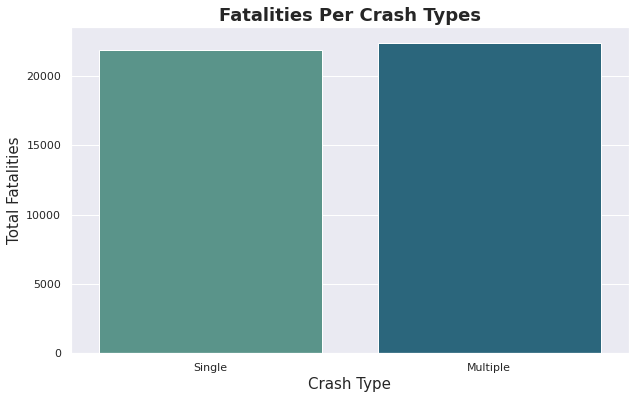

In [ ]:
# Which Crash Types are more prevelent 
plt.figure(figsize=(10,6))
sns.countplot(crashdata["Crash_Type"],palette="crest")
plt.title("Fatalities Per Crash Types",  fontsize = 18, fontweight='bold')
plt.ylabel("Total Fatalities", fontsize = 15)
plt.xlabel("Crash Type", fontsize = 15)
plt.show()
# Both look similar

Text(0, 0.5, 'Road User')

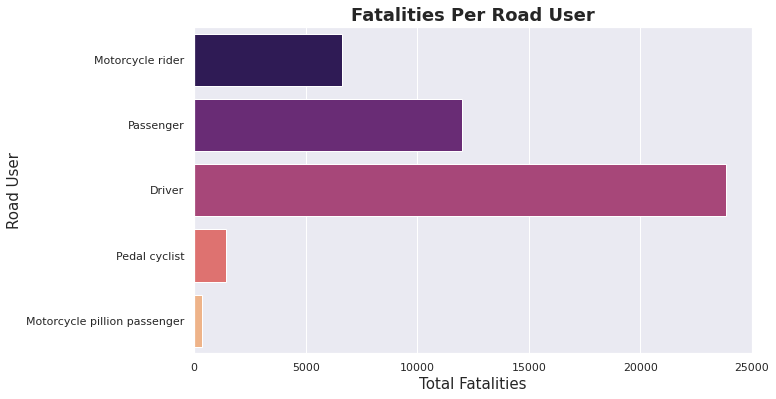

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y ='Road_User', data = crashdata, palette="magma")
plt.title("Fatalities Per Road User",  fontsize = 18, fontweight='bold')
plt.xlabel("Total Fatalities", fontsize = 15)
plt.ylabel("Road User", fontsize = 15)

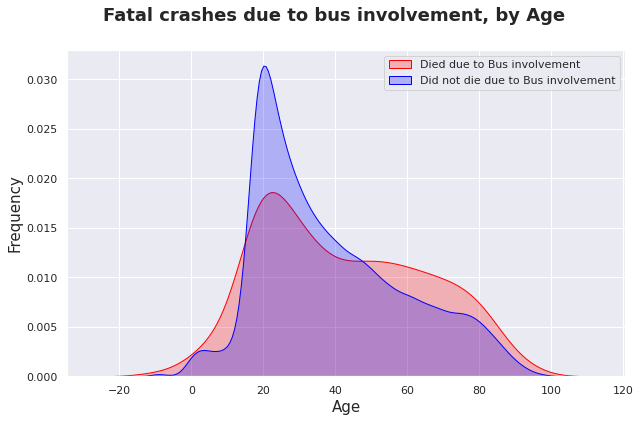

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))


sns.kdeplot(crashdata[crashdata["Bus_Involvement"]==1]["Age"], shade=True, color="Red", label="Died due to Bus involvement", ax=ax)
sns.kdeplot(crashdata[crashdata["Bus_Involvement"]==0]["Age"], shade=True, color="blue", label="Did not die due to Bus involvement", ax=ax)

ax.set_xlabel("Age", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)

fig.suptitle("Fatal crashes due to bus involvement, by Age ", fontsize = 18, fontweight='bold');
ax.legend();


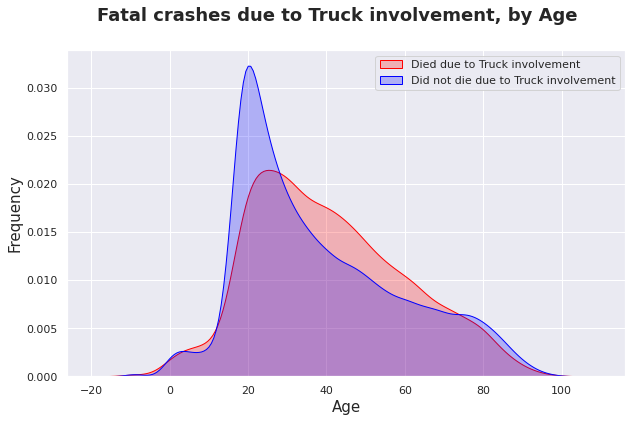

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.kdeplot(crashdata[crashdata["Articulated_Truck_Involvement"]==True]["Age"], shade=True, color="Red", label="Died due to Truck involvement", ax=ax)
sns.kdeplot(crashdata[crashdata["Articulated_Truck_Involvement"]==False]["Age"], shade=True, color="blue", label="Did not die due to Truck involvement", ax=ax)

ax.set_xlabel("Age",fontsize = 15)
ax.set_ylabel("Frequency",fontsize = 15)

fig.suptitle("Fatal crashes due to Truck involvement, by Age", fontsize = 18, fontweight='bold');
ax.legend();


In [ ]:
# we can see people around 17-40 are more likly to be involved in crashes which involve busses and trucks. 

# **2. Which State Is the Most Dangerous?**

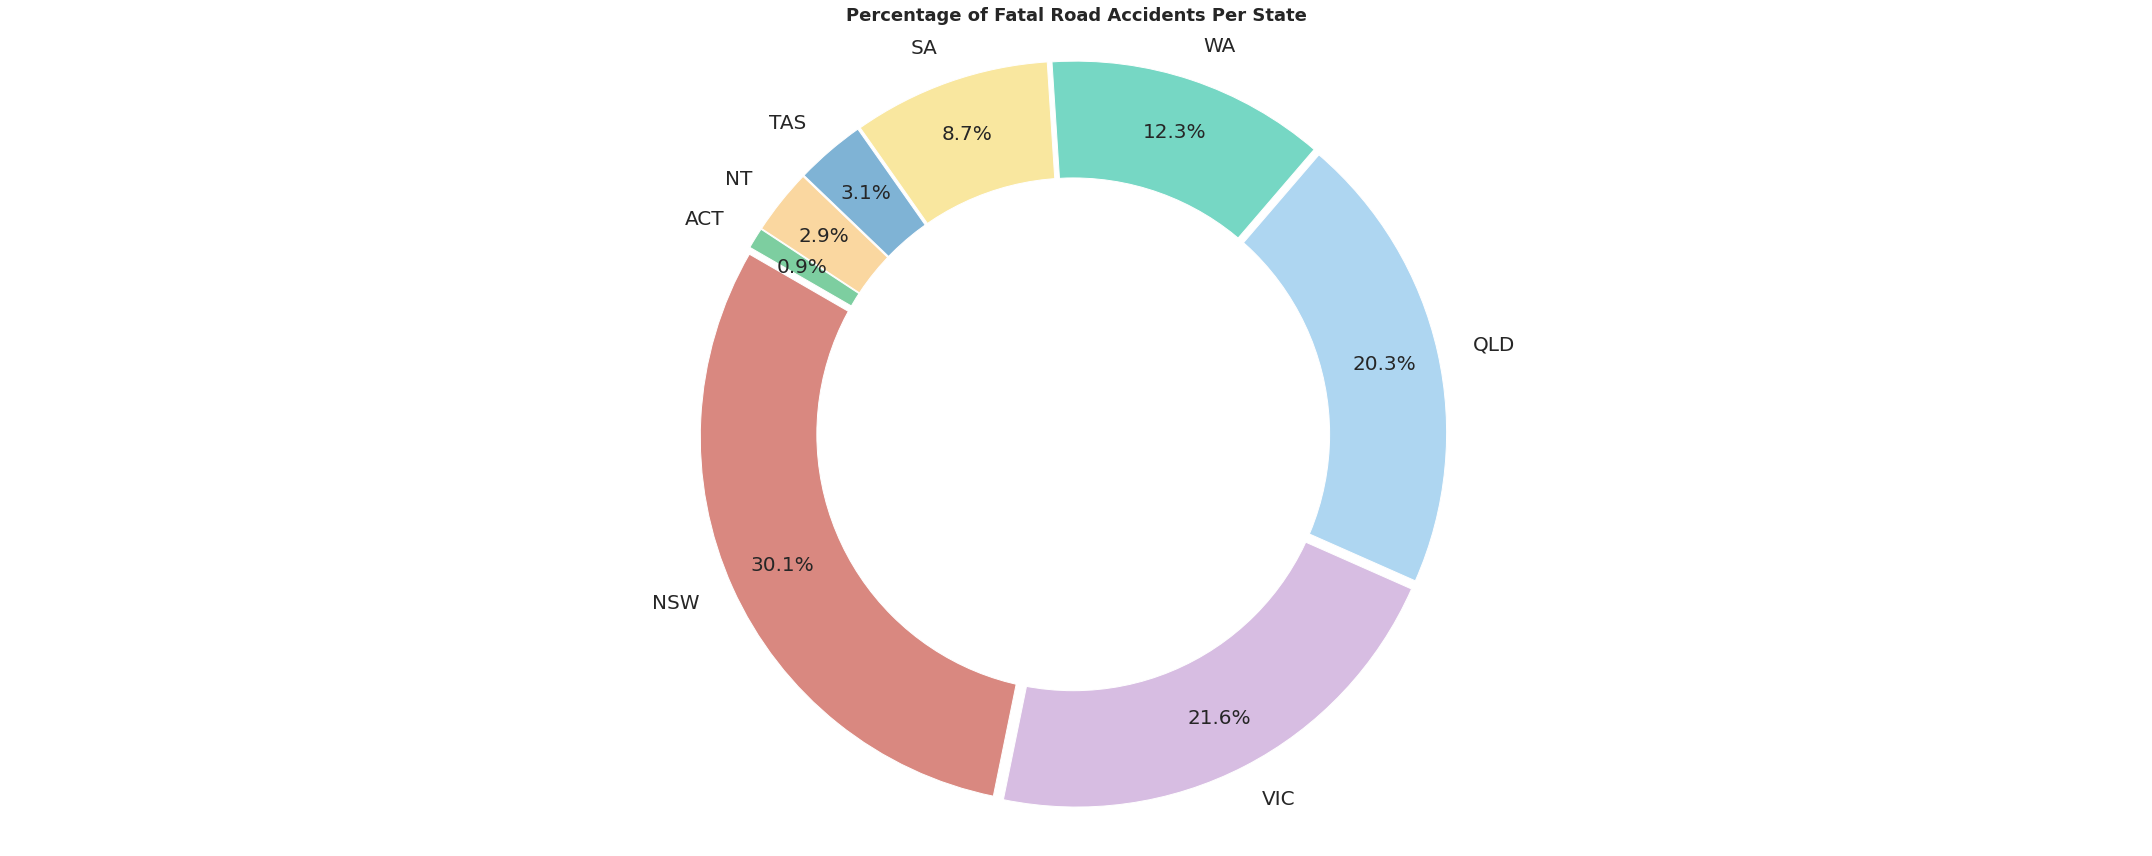

In [ ]:
import matplotlib.pyplot as plt


colors = ['#D98880','#D7BDE2','#AED6F1','#76D7C4','#F9E79F','#7FB3D5','#FAD7A0','#7DCEA0' ]
labels = ["NSW", "VIC", "QLD", "WA", "SA", "TAS", "NT", "ACT"]
textprops = {"fontsize":20}
fig1, ax1 = plt.subplots(figsize=(30,12))
explode = (0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02)
ax1.pie(crashdata['State'].value_counts(), labels = labels, colors = colors,  autopct='%1.1f%%', pctdistance=0.85,startangle=150, explode = explode, textprops=textprops)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.title('Percentage of Fatal Road Accidents Per State', fontsize = 18, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
df = crashdata[['State', 'Road_User']]
# Group boroughs and crimes and count numbers
df_grouped = df.groupby(['State', 'Road_User']).size().reset_index()
# Create a pivot table
table = pd.pivot_table(df_grouped, index=['State'], columns=['Road_User'])
# Delete columns with Nan values and convert to integers
table = table.dropna(axis=1).astype(int)
table
    

0                                                          \
Road_User Driver Motorcycle pillion passenger Motorcycle rider Passenger   
State                                                                      
ACT          198                            8               80       103   
NSW         7341                          104             1909      3600   
NT           579                            1              136       542   
Qld         4666                           83             1529      2402   
SA          2121                           25              535      1027   
Tas          752                           10              202       365   
Vic         5311                           76             1395      2412   
WA          2848                           56              847      1550   

                         
Road_User Pedal cyclist  
State                    
ACT                  21  
NSW                 374  
NT                   24  
Qld                 316  
SA                  152  
Tas                  38  
Vic                 350  
WA                  147

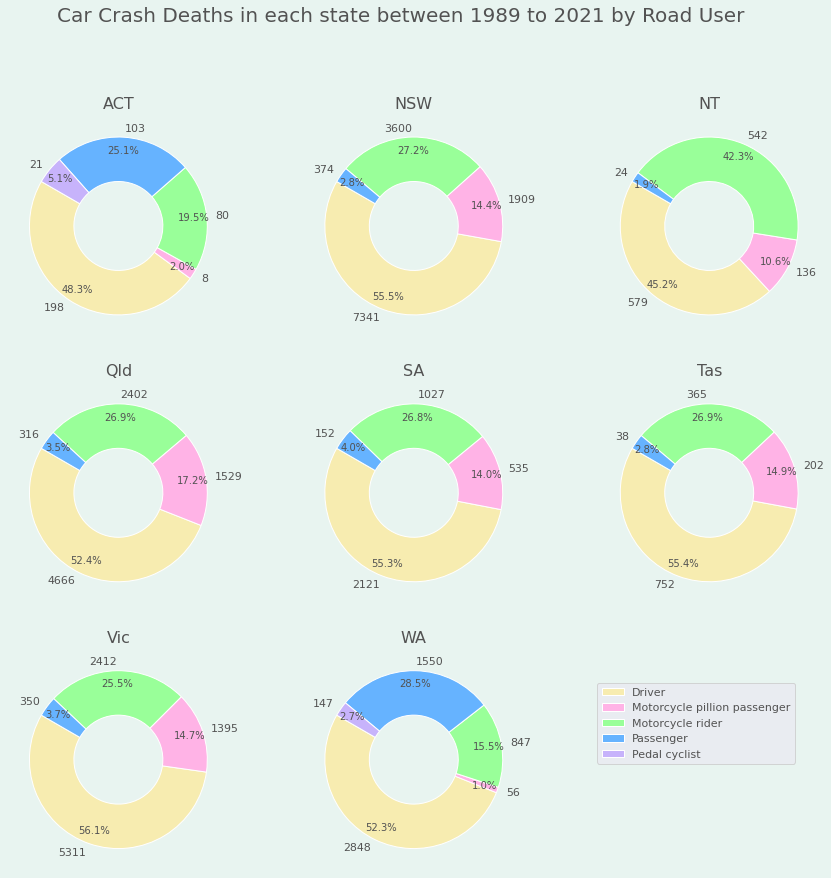

In [ ]:
font_color = '#525252'
colors = ['#f7ecb0', '#ffb3e6', '#99ff99', '#66b3ff', '#c7b3fb','#ff6666', '#f9c3b7']

fig, axes = plt.subplots(3, 3, figsize=(15, 15), facecolor='#e8f4f0')
# To remove the last plot
fig.delaxes(ax= axes[2,2])

for i, (idx, row) in enumerate(table.head(8).iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, 
           labels=row.values, 
           startangle=150, 
           wedgeprops=dict(width=.5), 
           colors=colors, 
           textprops={'color':font_color},autopct='%1.1f%%', pctdistance=0.85)
    ax.set_title(idx, fontsize=16, color=font_color)
    
    # [x[1] for x in row.index]: to access the second value in a tulpe, which is row.index
    legend = plt.legend([x[1] for x in row.index], 
                        bbox_to_anchor=(1.3, .87), 
                        loc='upper left',  
                        ncol=1, 
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color)
        fig.subplots_adjust(wspace=.2)

title = fig.suptitle('Car Crash Deaths in each state between 1989 to 2021 by Road User', y=.95, fontsize=20, color=font_color)
plt.subplots_adjust(top=0.85, bottom=0.15)

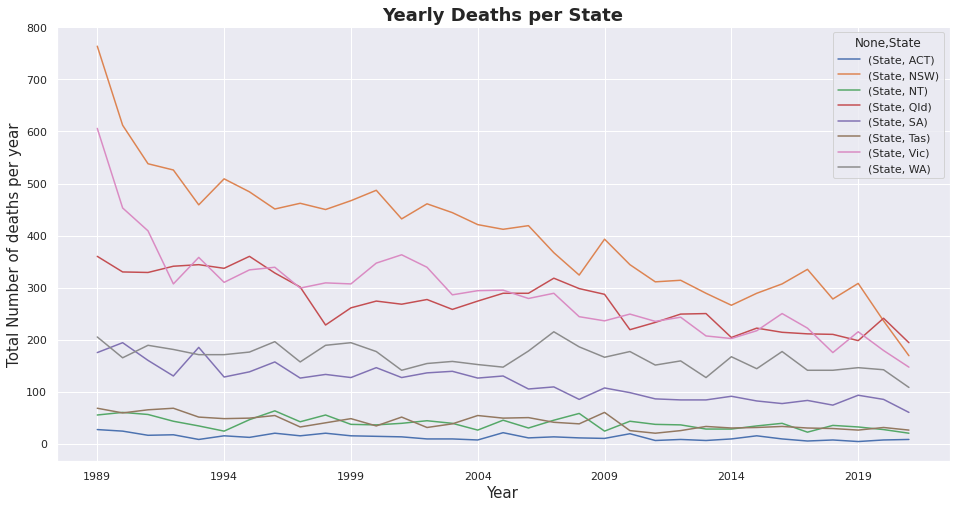

In [ ]:

fig= crashdata.pivot_table(index='Year', columns='State', aggfunc={'State':'count'}, fill_value=0).plot(figsize=(16,8))
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Total Number of deaths per year",fontsize = 15)
plt.title ("Yearly Deaths per State",fontsize = 18, fontweight='bold')
plt.show()

# **3. When do most accidents occur?**

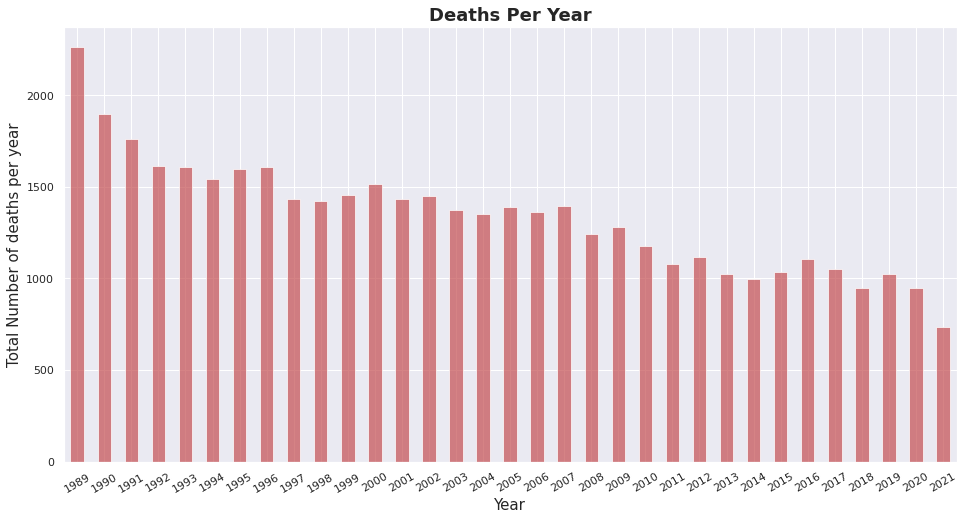

In [ ]:


fig, ax = plt.subplots(figsize=(16,8))
crashdata.groupby('Year')['Crash_ID'].count().plot.bar(color='r',alpha=0.7)
plt.xticks(rotation=30, horizontalalignment="center")
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Total Number of deaths per year",fontsize = 15)
plt.title ("Deaths Per Year",fontsize = 18, fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


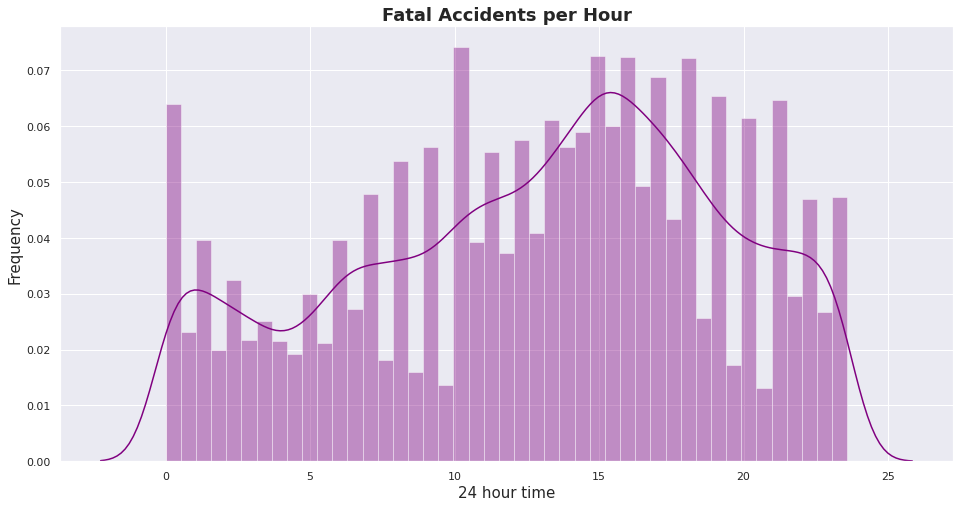

In [ ]:
# Crashtimes
plt.figure(figsize=(16,8))
c =sns.color_palette("pastel")
sns.distplot(crashdata["Time"],color="purple")
plt.title("Fatal Accidents per Hour", fontsize = 18, fontweight='bold')
plt.xlabel("24 hour time",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)

plt.show()

In [ ]:
crashdata.sort_values(by=['Month'], ascending=True,inplace=True)
by_month = crashdata.groupby(crashdata['Month']).count()

by_month

,Date,Crash_ID,State,Year,Day,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
Month,,,,,,,,,,,,,,,,,,
1,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722,3722
10,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824,3824
11,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776,3776
12,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014,4014
2,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363,3363
3,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940,3940
4,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549,3549
5,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587
6,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503,3503


Text(0, 0.5, 'Frequency')

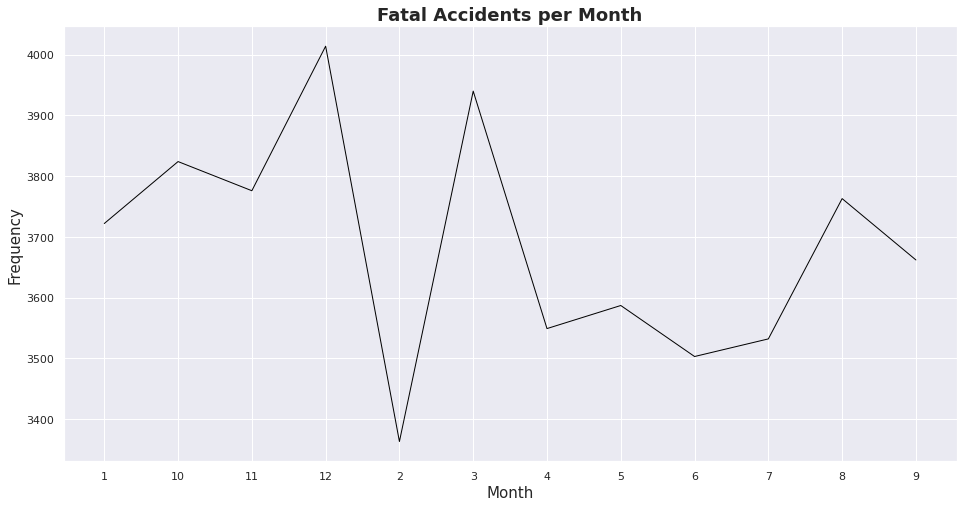

In [ ]:
plt.figure(figsize=(16,8))
sns.set(font_scale = 1)
sns.lineplot(data=by_month, x ='Month',y='Crash_ID', sort= False, lw=1,color = "black")
plt.title("Fatal Accidents per Month", fontsize = 18, fontweight='bold')
plt.xlabel("Month",fontsize = 15)
plt.ylabel("Frequency",fontsize = 15)

In [ ]:
crashdata["Month"].value_counts()

12    4014
3     3940
10    3824
11    3776
8     3763
1     3722
9     3662
5     3587
4     3549
7     3532
6     3503
2     3363
Name: Month, dtype: int64

In [ ]:
crashdata.set_index('Month', inplace=True)
ts1 =crashdata.sort_index(ascending=True)
display(crashdata)

,Date,Crash_ID,State,Year,Day,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
Month,,,,,,,,,,,,,,,,,,
1,03-01-1989,19896063,Tas,1989,2,12.40,Multiple,0.0,0.0,60,Passenger,Female,63,0,0,40_to_64,Weekday,Day
1,01-01-1999,19994089,SA,1999,5,1.45,Multiple,0.0,0.0,110,Passenger,Female,24,0,0,17_to_25,Weekday,Night
1,01-01-1999,19994089,SA,1999,5,1.45,Multiple,0.0,0.0,110,Driver,Female,23,0,0,17_to_25,Weekday,Night
1,01-01-1999,19994089,SA,1999,5,1.45,Multiple,0.0,0.0,110,Driver,Male,20,0,0,17_to_25,Weekday,Night
1,07-01-1999,19991107,NSW,1999,4,23.15,Multiple,0.0,1.0,110,Driver,Male,19,0,0,17_to_25,Weekday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,05-09-1998,19987036,NT,1998,6,15.00,Multiple,0.0,0.0,100,Passenger,Female,35,0,0,26_to_39,Weekend,Day
9,05-09-1998,19983086,Qld,1998,6,11.00,Single,0.0,0.0,100,Driver,Female,39,0,0,26_to_39,Weekend,Day
9,06-09-1998,19982116,Vic,1998,7,17.40,Single,0.0,0.0,60,Motorcycle rider,Male,23,0,0,17_to_25,Weekend,Day


In [ ]:
crashdata.set_index('Year', inplace=True)
ts =crashdata.sort_index(ascending=True)
display(crashdata)

,Date,Crash_ID,State,Day,Time,Crash_Type,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Road_User,Gender,Age,Christmas_Period,Easter_Period,Age_Group,Day_of_week,Time_of_day
Year,,,,,,,,,,,,,,,,,
1989,03-01-1989,19896063,Tas,2,12.40,Multiple,0.0,0.0,60,Passenger,Female,63,0,0,40_to_64,Weekday,Day
1999,01-01-1999,19994089,SA,5,1.45,Multiple,0.0,0.0,110,Passenger,Female,24,0,0,17_to_25,Weekday,Night
1999,01-01-1999,19994089,SA,5,1.45,Multiple,0.0,0.0,110,Driver,Female,23,0,0,17_to_25,Weekday,Night
1999,01-01-1999,19994089,SA,5,1.45,Multiple,0.0,0.0,110,Driver,Male,20,0,0,17_to_25,Weekday,Night
1999,07-01-1999,19991107,NSW,4,23.15,Multiple,0.0,1.0,110,Driver,Male,19,0,0,17_to_25,Weekday,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,05-09-1998,19987036,NT,6,15.00,Multiple,0.0,0.0,100,Passenger,Female,35,0,0,26_to_39,Weekend,Day
1998,05-09-1998,19983086,Qld,6,11.00,Single,0.0,0.0,100,Driver,Female,39,0,0,26_to_39,Weekend,Day
1998,06-09-1998,19982116,Vic,7,17.40,Single,0.0,0.0,60,Motorcycle rider,Male,23,0,0,17_to_25,Weekend,Day


Text(0, 0.5, 'Total Deaths')

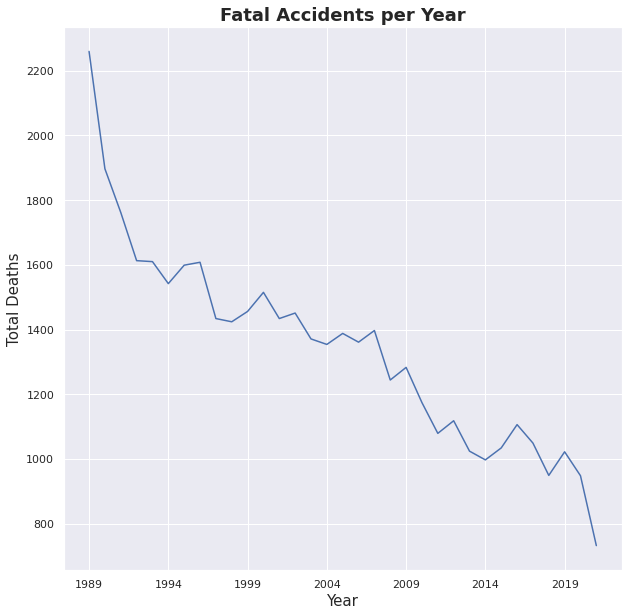

In [ ]:
fig = plt.figure()

fig.set_size_inches(10, 10)

crashdata.groupby(ts.index).size().plot()
plt.title("Fatal Accidents per Year", fontsize = 18, fontweight='bold')
plt.xlabel("Year",fontsize = 15)
plt.ylabel("Total Deaths",fontsize = 15)

Text(0.5, 0, 'Day Of The Week')

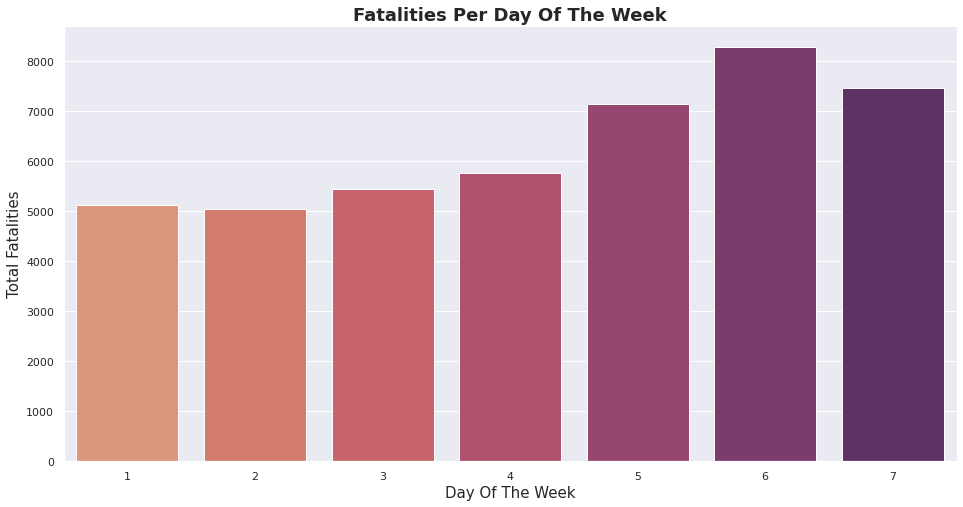

In [ ]:
countplt, ax = plt.subplots(figsize = (16,8))
ax =sns.countplot(x = 'Day', data=crashdata, palette='flare')
plt.title("Fatalities Per Day Of The Week",  fontsize = 18, fontweight='bold')
plt.ylabel("Total Fatalities", fontsize = 15)
plt.xlabel("Day Of The Week", fontsize = 15)

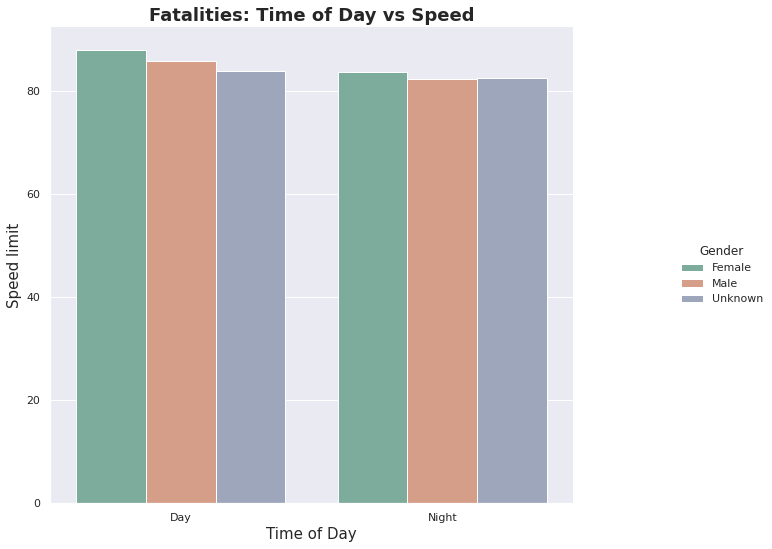

In [ ]:

sns.catplot(x="Time_of_day", y="Speed_Limit", hue = "Gender",
                data=crashdata, saturation=.5,
                kind="bar", ci=None, aspect=.9,palette='Set2')
plt.title("Fatalities: Time of Day vs Speed",  fontsize = 18, fontweight='bold')
plt.ylabel("Speed limit", fontsize = 15)
plt.xlabel("Time of Day", fontsize = 15)
plt.gcf().set_size_inches(12, 8)


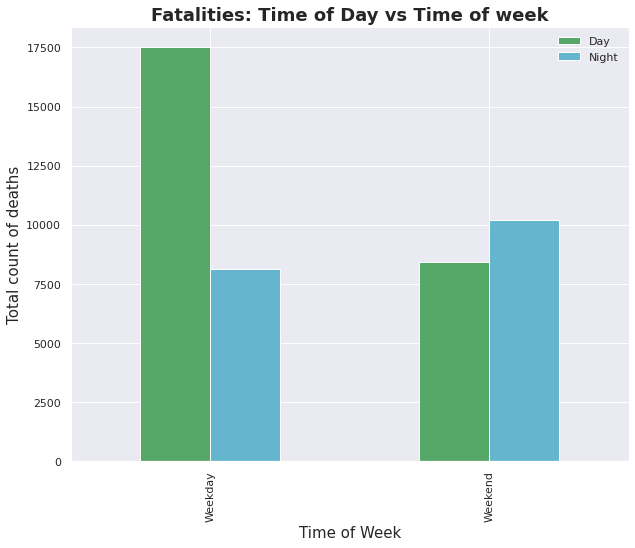

In [ ]:
crashdata.groupby(by=['Day_of_week', 'Time_of_day']).agg({'Time_of_day': 'count'}).unstack().plot(kind='bar', figsize=(10,8), color=('g','c'))
plt.title("Fatalities: Time of Day vs Time of week",  fontsize = 18, fontweight='bold')
plt.ylabel("Total count of deaths", fontsize = 15)
plt.xlabel("Time of Week", fontsize = 15)

plt.legend(loc='upper right', frameon=False,labels=["Day", "Night"])

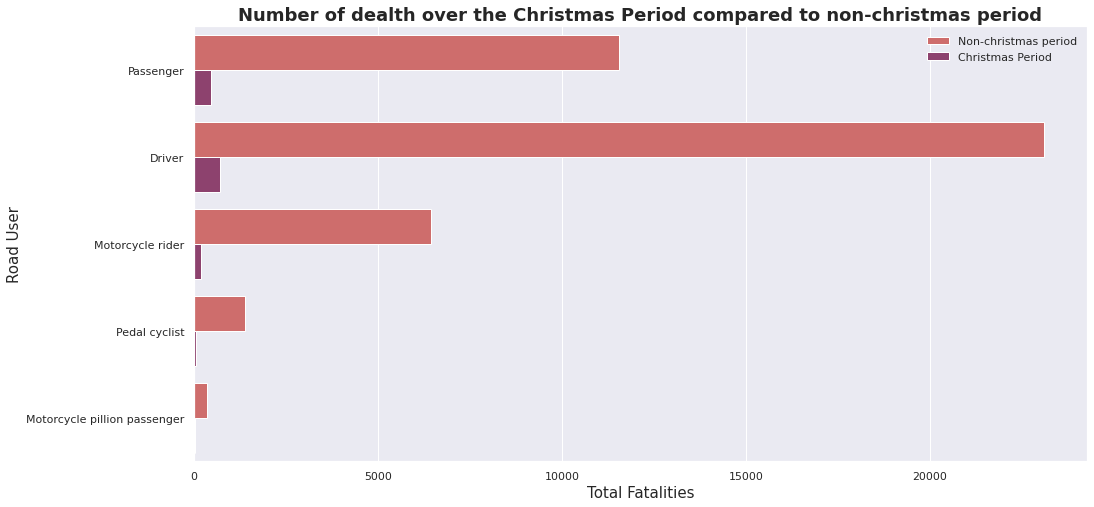

In [ ]:
countplt, ax = plt.subplots(figsize = (16,8))
sns.countplot(y ='Road_User', hue = "Christmas_Period", data = crashdata,palette='flare')
plt.title("Number of dealth over the Christmas Period compared to non-christmas period",  fontsize = 18, fontweight='bold')
plt.ylabel("Road User", fontsize = 15)
plt.xlabel("Total Fatalities", fontsize = 15)
plt.legend(loc='upper right', frameon=False,labels=["Non-christmas period", "Christmas Period"])

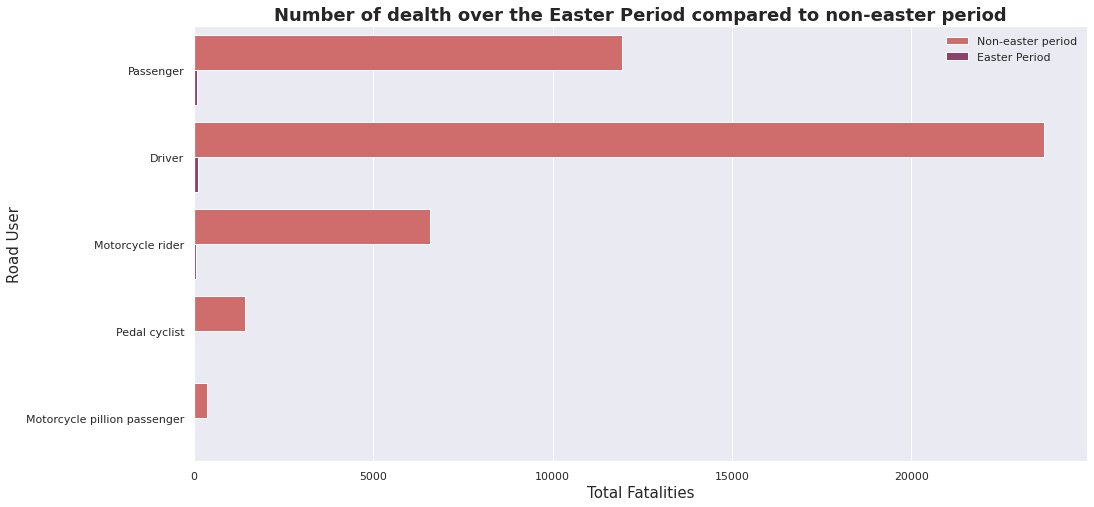

In [ ]:
countplt, ax = plt.subplots(figsize = (16,8))
sns.countplot(y ='Road_User', hue = "Easter_Period", data = crashdata,palette='flare')
plt.title("Number of dealth over the Easter Period compared to non-easter period",  fontsize = 18, fontweight='bold')
plt.ylabel("Road User", fontsize = 15)
plt.xlabel("Total Fatalities", fontsize = 15)
plt.legend(loc='upper right', frameon=False,labels=["Non-easter period", "Easter Period"])

# **4. Which Demographic contibutes to the greatest fatalities?**

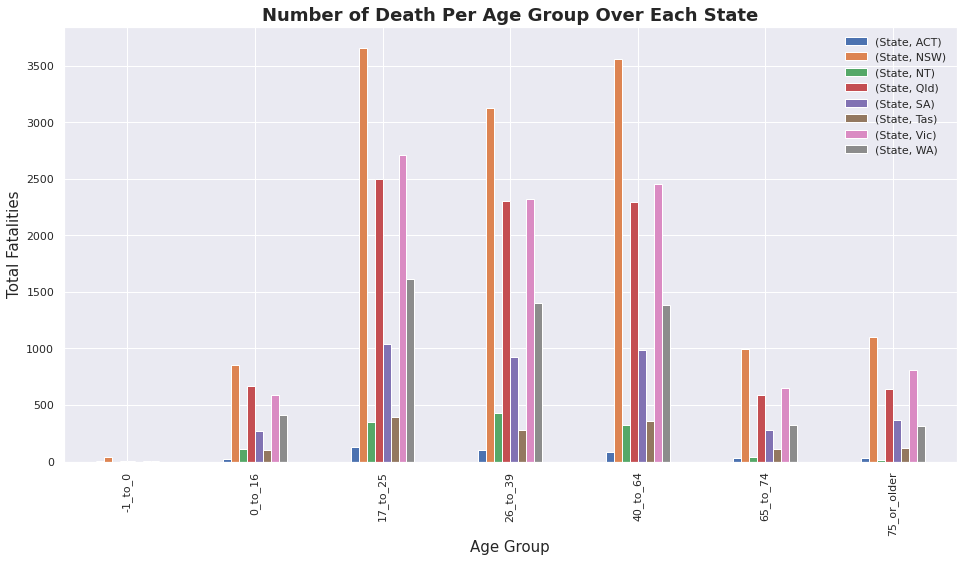

In [ ]:
# State vs age group
crashdata.groupby(by=['Age_Group', 'State']).agg({'State': 'count'}).unstack().plot(kind='bar',figsize=(16,8))

plt.title("Number of Death Per Age Group Over Each State",  fontsize = 18, fontweight='bold')
plt.ylabel("Total Fatalities", fontsize = 15)
plt.xlabel("Age Group", fontsize = 15)
plt.legend(loc='upper right', frameon=False)

Text(0, 0.5, 'Total Deaths')

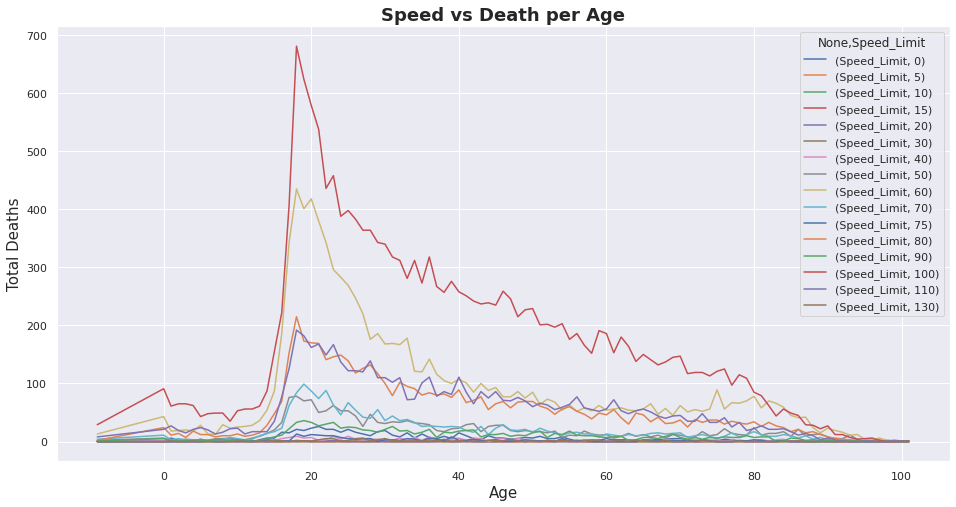

In [ ]:
a= crashdata.pivot_table(index='Age', columns='Speed_Limit', aggfunc={'Speed_Limit':'count'}, fill_value=0).plot(figsize=(16,8))

plt.title("Speed vs Death per Age", fontsize = 18, fontweight='bold')
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Total Deaths",fontsize = 15)

In [ ]:
counts_df = crashdata.groupby(["Age", "Gender"])["Crash_ID"].count().unstack()

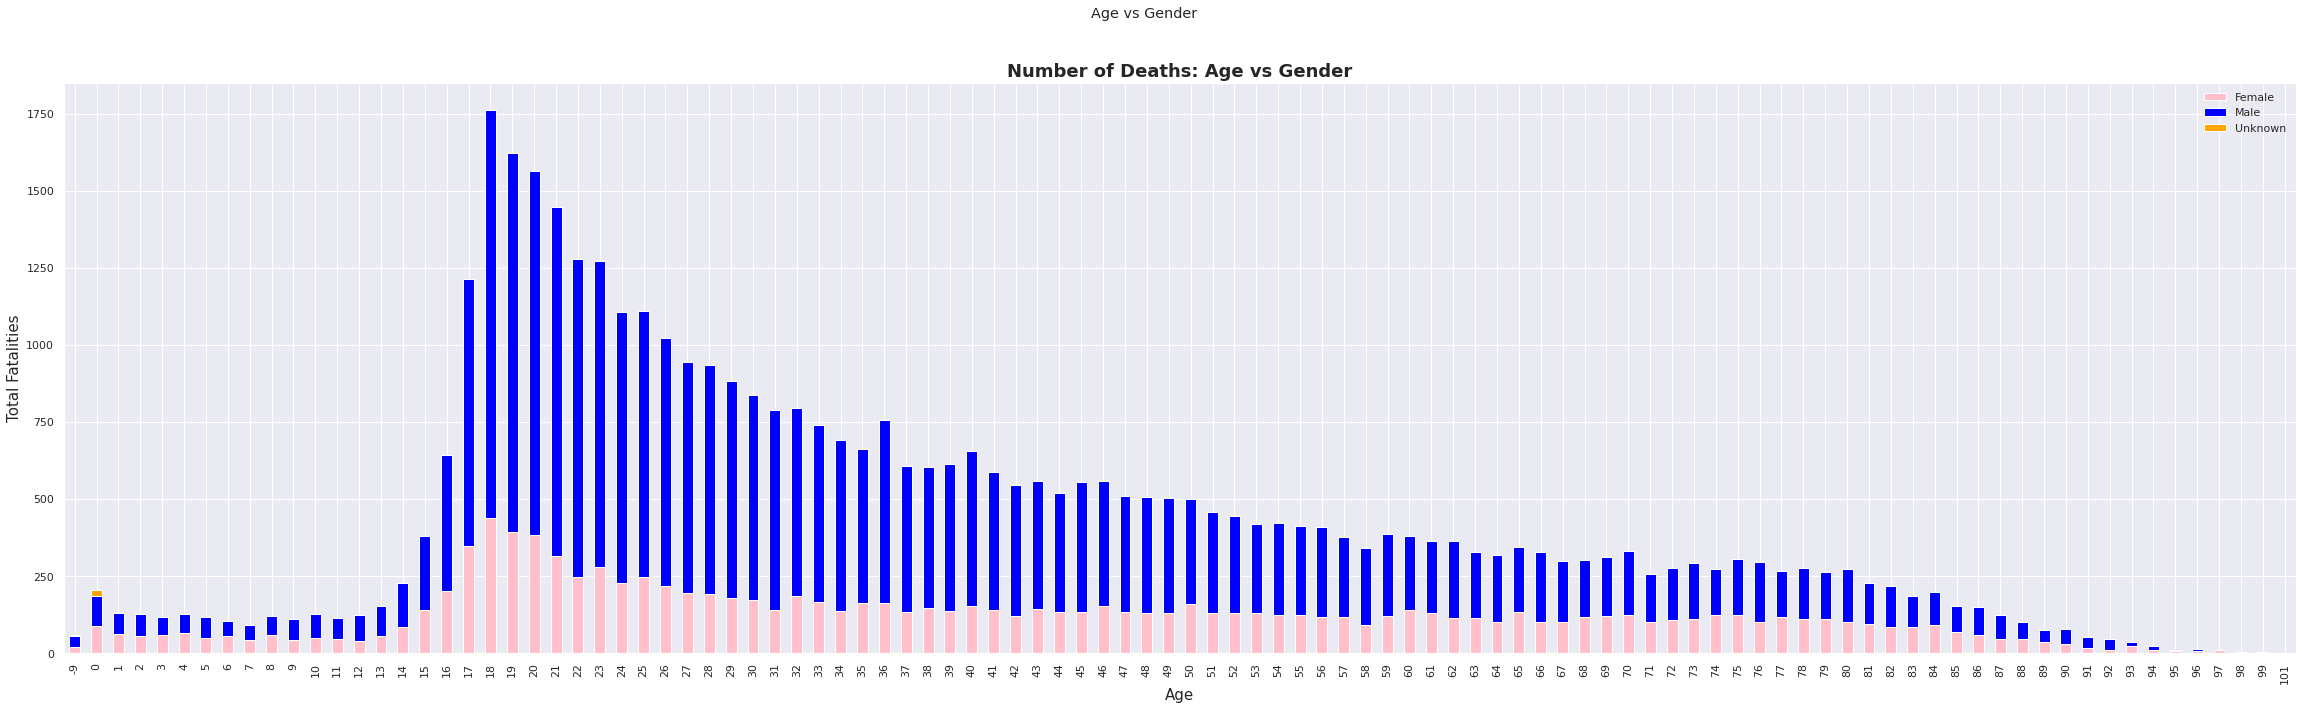

In [ ]:

fig, ax = plt.subplots()
counts_df.plot(kind="bar", stacked=True, color=["pink", "blue", "orange"], ax=ax)
x= crashdata["Age"]
ax.set_xlabel("Age")

ax.set_ylabel("Count")
fig.set_size_inches(40, 10.5)
fig.suptitle("Age vs Gender")

plt.title("Number of Deaths: Age vs Gender",  fontsize = 18, fontweight='bold')
plt.ylabel("Total Fatalities", fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.legend(loc='upper right', frameon=False)
plt.show()



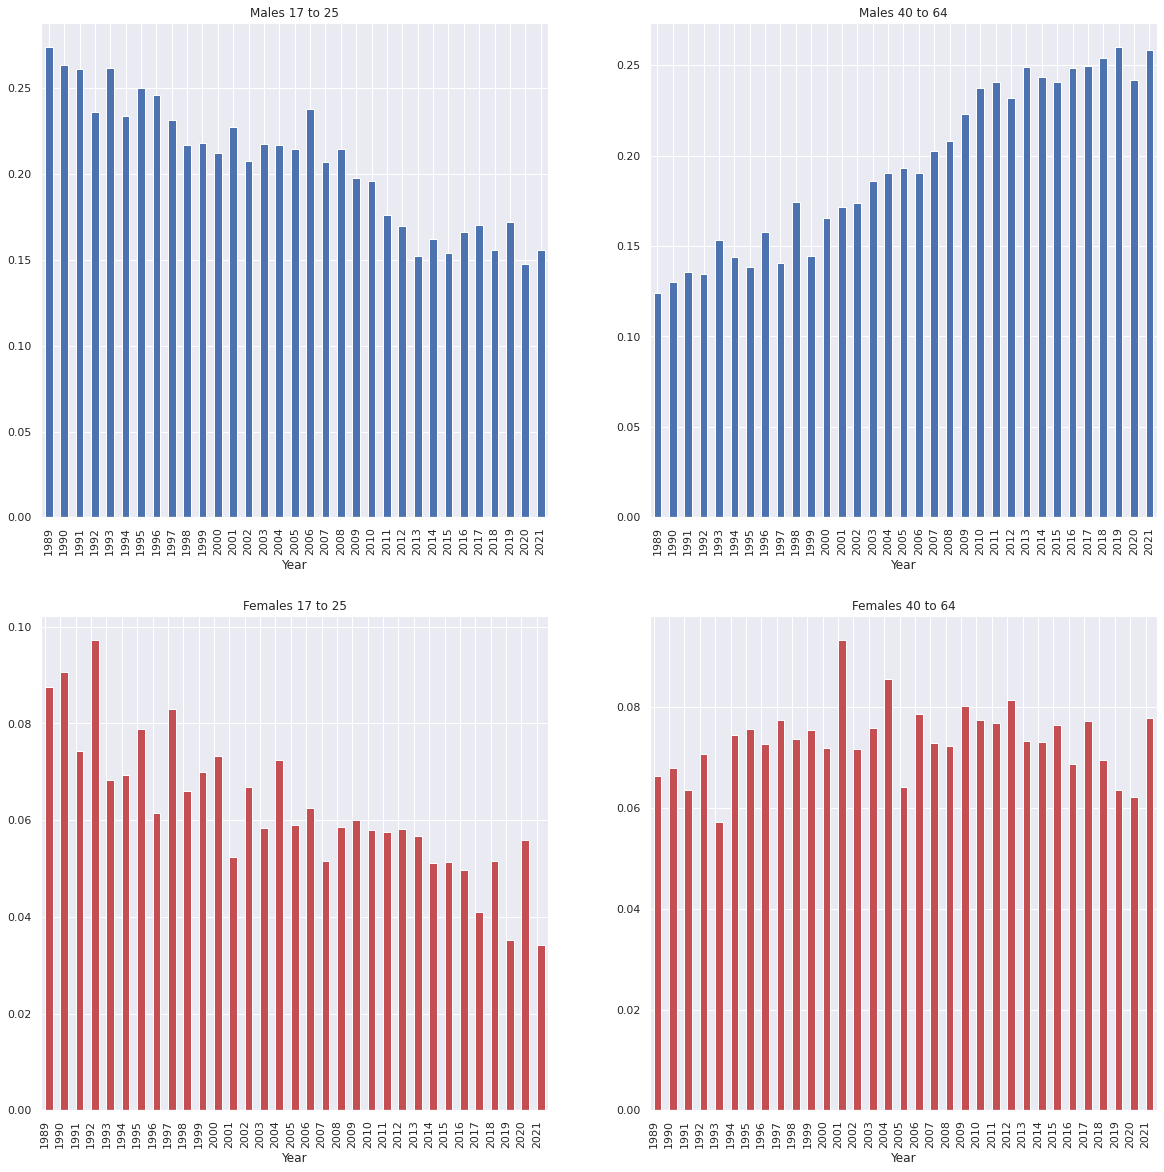

In [ ]:

fig, ax = plt.subplots(figsize=(20,20))
ax = plt.subplot(221)
male_plot = crashdata[(crashdata['Gender']=='Male') & (crashdata['Age_Group']=='17_to_25') ].groupby('Year')['Crash_ID'].count() / crashdata.groupby('Year')['Crash_ID'].count()
male_plot.plot.bar(title='Males 17 to 25')


ax = plt.subplot(223)
female_plot = crashdata[(crashdata['Gender']=='Female') & (crashdata['Age_Group']=='17_to_25') ].groupby('Year')['Crash_ID'].count() / crashdata.groupby('Year')['Crash_ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 17 to 25')


ax = plt.subplot(222)
male_plot = crashdata[(crashdata['Gender']=='Male') & (crashdata['Age_Group']=='40_to_64') ].groupby('Year')['Crash_ID'].count() / crashdata.groupby('Year')['Crash_ID'].count()
male_plot.plot.bar(title='Males 40 to 64')


ax = plt.subplot(224)
female_plot = crashdata[(crashdata['Gender']=='Female') & (crashdata['Age_Group']=='40_to_64') ].groupby('Year')['Crash_ID'].count() / crashdata.groupby('Year')['Crash_ID'].count()
female_plot.plot.bar( align='edge', color='r', title='Females 40 to 64')

# plt.ylim(female_plot.min(), male_plot.max())

plt.show()

In [ ]:
val=crashdata.groupby(["Day"]).sum().sort_values("Speed_Limit")
val

,Crash_ID,Time,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Age,Christmas_Period,Easter_Period
Day,,,,,,,,
2,100903453391,66405.01,84.0,734.0,427455,206208,222,1
1,102451766360,65770.93,102.0,735.0,436210,208469,175,44
3,109146997303,72089.01,95.0,809.0,463700,221456,201,3
4,115592050516,76666.35,109.0,826.0,486245,230895,223,49
5,142905487296,97525.79,143.0,791.0,605650,270989,189,49
7,149348351497,87786.21,69.0,429.0,634790,267967,207,37
6,165784136183,99639.54,87.0,515.0,703320,294151,212,49


# Correlation

In [ ]:
crashdata.corr()

,Crash_ID,Day,Time,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Age,Christmas_Period,Easter_Period
Crash_ID,1.000000,-0.019719,-0.007197,-0.017227,-0.024115,0.050927,0.146606,-0.004616,0.079241
Day,-0.019719,1.000000,-0.065280,-0.025946,-0.110954,-0.000610,-0.099385,-0.027537,0.006524
Time,-0.007197,-0.065280,1.000000,-0.002338,-0.044952,-0.009644,0.034263,-0.000872,-0.001574
Bus_Involvement,-0.017227,-0.025946,-0.002338,1.000000,-0.010161,-0.038355,0.023162,-0.012657,-0.001551
Articulated_Truck_Involvement,-0.024115,-0.110954,-0.044952,-0.010161,1.000000,0.123392,0.036635,-0.025939,-0.013415
Speed_Limit,0.050927,-0.000610,-0.009644,-0.038355,0.123392,1.000000,0.028566,0.018458,0.006315
Age,0.146606,-0.099385,0.034263,0.023162,0.036635,0.028566,1.000000,-0.018576,0.001685
Christmas_Period,-0.004616,-0.027537,-0.000872,-0.012657,-0.025939,0.018458,-0.018576,1.000000,-0.013267
Easter_Period,0.079241,0.006524,-0.001574,-0.001551,-0.013415,0.006315,0.001685,-0.013267,1.000000


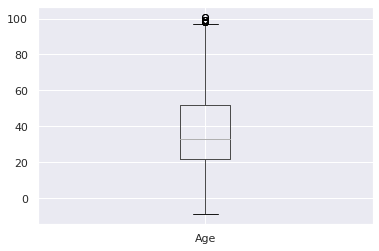

In [ ]:
crashdata.boxplot(column= "Age")

In [ ]:
crashdata["Age"].describe()

count    44235.000000
mean        38.434158
std         20.665807
min         -9.000000
25%         22.000000
50%         33.000000
75%         52.000000
max        101.000000
Name: Age, dtype: float64

# Hypothesis Testing

In [ ]:
#loading the dataset
from sklearn import datasets
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt



*   Null: Adults aged 17-25 are more likly to be involved in high speed fatal crashes then adults aged 40-64 
*   Alternative : Adults aged 40-64 are no more likly to be involved in fatal crashes then adults aged 17-25



In [ ]:
# collecting the total number of deaths per aged group using grouped by
Count_Age_Group= crashdata.groupby('Age_Group').agg({"Crash_ID": 'count'})

In [ ]:
crashdata.groupby('Age_Group').agg({"Crash_ID": 'count'})

,Crash_ID
Age_Group,
-1_to_0,60
0_to_16,3028
17_to_25,12383
26_to_39,10892
40_to_64,11441
65_to_74,3025
75_or_older,3406


In [ ]:
#Collecting data from the 40-64 age group
Old_age =crashdata.groupby('Age_Group').get_group('40_to_64')

In [ ]:
Old_age.describe()

,Crash_ID,Day,Time,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Age,Christmas_Period,Easter_Period
count,1.144100e+04,11441.000000,11441.000000,11441.000000,11441.000000,11441.000000,11441.000000,11441.000000,11441.000000
mean,2.004859e+07,4.226117,13.021530,0.017219,0.142645,87.999738,50.636221,0.029805,0.004807
std,9.383202e+04,1.984777,5.681307,0.130091,0.349726,21.016246,7.132267,0.170057,0.069171
min,1.989100e+07,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
25%,1.996702e+07,3.000000,9.000000,0.000000,0.000000,80.000000,44.000000,0.000000,0.000000
50%,2.005111e+07,4.000000,13.500000,0.000000,0.000000,100.000000,50.000000,0.000000,0.000000
75%,2.012700e+07,6.000000,17.200000,0.000000,0.000000,100.000000,57.000000,0.000000,0.000000
max,2.021801e+07,7.000000,23.590000,1.000000,1.000000,130.000000,64.000000,1.000000,1.000000


In [ ]:
#Collecting data from the 17-25 age group
young_age = crashdata.groupby('Age_Group').get_group('17_to_25')

In [ ]:
young_age.describe()

,Crash_ID,Day,Time,Bus_Involvement,Articulated_Truck_Involvement,Speed_Limit,Age,Christmas_Period,Easter_Period
count,1.238300e+04,12383.000000,12383.000000,12383.000000,12383.000000,12383.000000,12383.000000,12383.000000,12383.000000
mean,2.001679e+07,4.607284,12.168227,0.011952,0.075022,82.511508,20.728014,0.034402,0.004765
std,9.097645e+04,1.961164,7.461747,0.108674,0.263438,22.386565,2.486207,0.182267,0.068864
min,1.989100e+07,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000
25%,1.993512e+07,3.000000,5.050000,0.000000,0.000000,60.000000,19.000000,0.000000,0.000000
50%,2.000312e+07,5.000000,13.300000,0.000000,0.000000,90.000000,21.000000,0.000000,0.000000
75%,2.008325e+07,6.000000,18.550000,0.000000,0.000000,100.000000,23.000000,0.000000,0.000000
max,2.021801e+07,7.000000,23.590000,1.000000,1.000000,130.000000,25.000000,1.000000,1.000000


In [ ]:
# collecting the count of speed limit 
Count_Speed_Limit = crashdata.groupby('Speed_Limit').agg({ "Crash_ID" : 'count'})

In [ ]:
Count_Speed_Limit

,Crash_ID
Speed_Limit,
0,580
5,2
10,8
15,1
20,21
30,7
40,228
50,1905
60,9347


In [ ]:
# Making random samples
YAS = young_age.sample(100, random_state = 42)
OAS = Old_age.sample(100, random_state = 42)

In [ ]:
# here i am making the assumption that "Speeding" = any speed > 60kph
YASL = YAS['Speed_Limit']>=60

In [ ]:
print(YASL)

Year
1991    True
1993    True
2002    True
2000    True
1998    True
        ... 
2016    True
2015    True
1997    True
2014    True
2008    True
Name: Speed_Limit, Length: 100, dtype: bool


In [ ]:
OASL = OAS["Speed_Limit"]>=60


In [ ]:

print(OASL)

Year
2020    True
1991    True
2004    True
1989    True
2020    True
        ... 
1990    True
2006    True
2015    True
1990    True
2016    True
Name: Speed_Limit, Length: 100, dtype: bool


In [ ]:
alpha = 0.05

In [ ]:

## Calculate the variance to get the standard deviation
var_OASL = OASL.var(ddof = 1)
var_YASL = YASL.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_OASL + var_YASL)/2)

In [ ]:
# checking the varrience 
print(np.var(OASL), np.var(YASL))

0.0564 0.02910000000000001


In [ ]:
# Caculating T score
N = 100
t = (OASL.mean() - YASL.mean()) / (s * np.sqrt(2 / N))  # t-statistic
t

-1.0208355710680816

In [ ]:
## Compare with the critical t-value
## Degrees of freedom
from scipy import stats
crashdata = 2*N - 2

#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = crashdata) 
else:
    p = stats.t.cdf(t, df = crashdata)

In [ ]:
# T and p values
print("t = " + str(t))
print("p = " + str(2*p))

t = -1.0208355710680816
p = 0.30857801558041825


In [ ]:
# Double Checking t and p values with Scipy
from scipy import stats
print(stats.ttest_ind(OASL,YASL, equal_var=True))

Ttest_indResult(statistic=-1.0208355710680816, pvalue=0.30857801558041825)


In [ ]:
p = stats.ttest_ind(OASL,YASL).pvalue
p


0.30857801558041825

In [ ]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [ ]:
print_sig(p, alpha)

We fail to reject our null hypothesis.


In [ ]:
# Thus there no diffrence between high speed fatality rates betwwen each group